In [152]:
import pandas as pd
import numpy as np


In [153]:
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [154]:
data = pd.read_csv("Used_Bikes.csv")

## EDA & Feature Engineering

In [155]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [156]:
data.tail()

,bike_name,price,city,kms_driven,owner,age,power,brand
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero
32647,Bajaj Pulsar 150cc,22000.0,Pune,60857.0,First Owner,13.0,150.0,Bajaj


In [157]:
data.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [159]:
data.shape

(32648, 8)

In [160]:
data.duplicated().sum()

25324

In [161]:
# Drop the duplicated values
data.drop_duplicates(inplace=True)

In [162]:
data.count()

bike_name     7324
price         7324
city          7324
kms_driven    7324
owner         7324
age           7324
power         7324
brand         7324
dtype: int64

In [163]:
data.shape

(7324, 8)

In [164]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']
numerical_feature = data.select_dtypes(exclude="object").columns

In [165]:
print("Categorical feature are : ",categorical_feature)
print("numerical_feature are :",numerical_feature)

Categorical feature are :  ['bike_name', 'city', 'owner', 'brand']
numerical_feature are : Index(['price', 'kms_driven', 'age', 'power'], dtype='object')


In [166]:
import seaborn as sns

In [167]:
top_ten_expensive_bike = data.groupby("bike_name")["price"].mean().sort_values(ascending=True).reset_index().head(10)
top_ten_expensive_bike


,bike_name,price
0,LML Freedom DX 110cc,4400.0
1,Hero Ambition 135cc,5000.0
2,Hero Honda Ambition 135cc,7500.0
3,Suzuki Heat 125cc,8000.0
4,TVS Star 100cc,9000.0
5,TVS Fiero 150cc,12000.0
6,Bajaj XCD 125,13000.0
7,TVS Flame 125cc,13600.0
8,Bajaj Boxer CT100,14500.0
9,Hero Splendor Plus 100 cc,15000.0


<Axes: xlabel='bike_name', ylabel='price'>

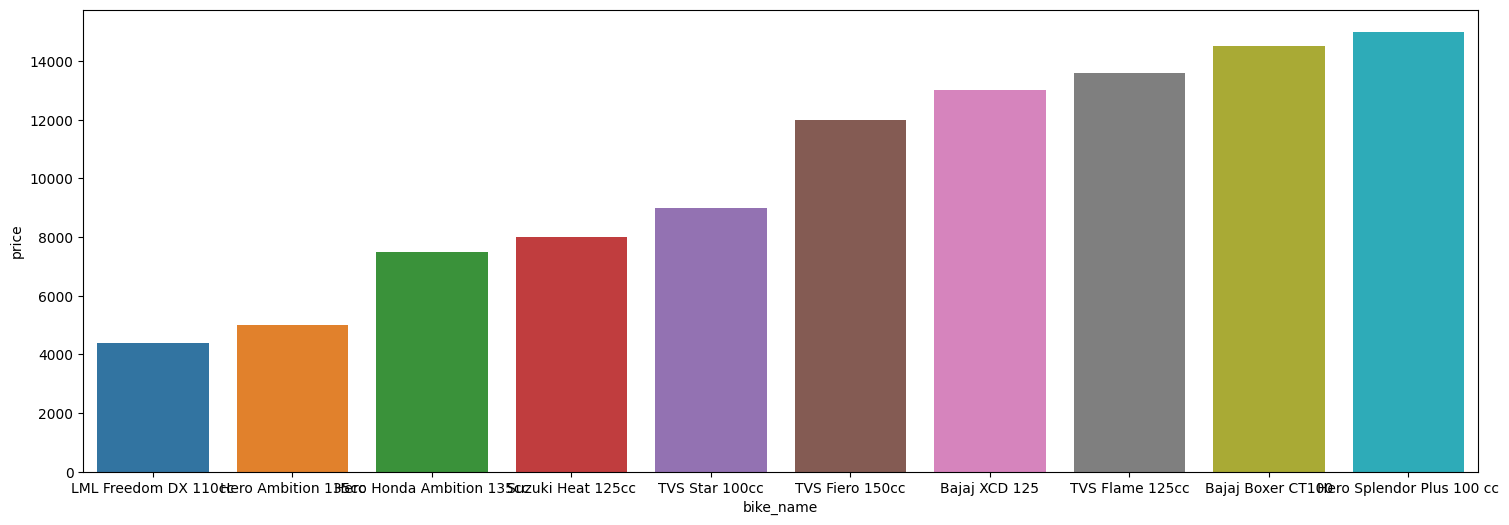

In [168]:
plt.figure(figsize=(18,6))
sns.barplot(x="bike_name",y="price",data=top_ten_expensive_bike)

In [169]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [170]:
price_with_age = data.groupby("price")["age"].mean().sort_index(ascending=True).reset_index().head(5)
price_with_age

,price,age
0,4400.0,16.0
1,5000.0,18.0
2,5800.0,13.0
3,6400.0,18.0
4,6700.0,17.0


In [171]:
price_with_age = data.groupby("age")["price"].mean().sort_index(ascending=True).reset_index().head(5)
price_with_age

,age,price
0,1.0,299800.000000
1,2.0,148872.493243
2,3.0,129113.037383
3,4.0,119165.138504
4,5.0,99384.925681


<Axes: xlabel='age', ylabel='price'>

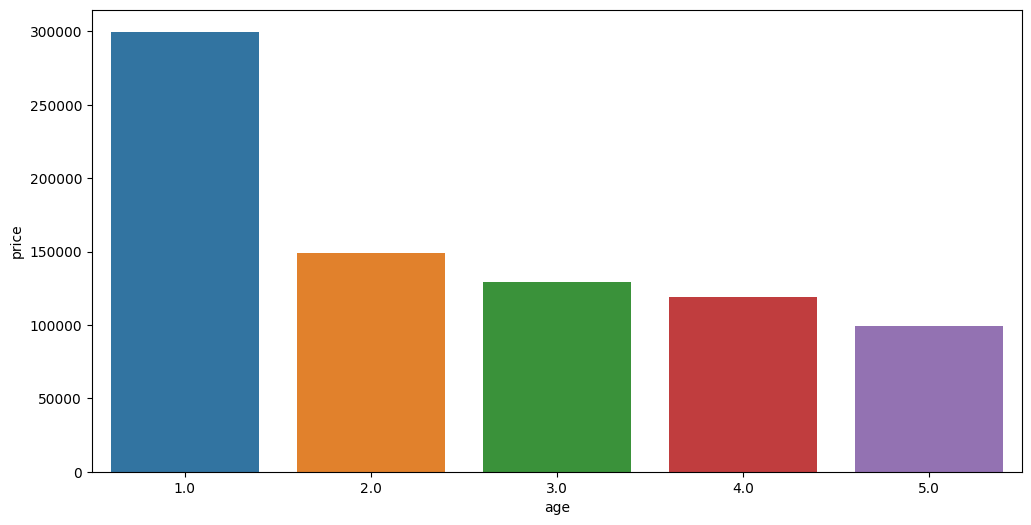

In [172]:
plt.figure(figsize=(12,6))
sns.barplot(x="age",y="price",data=price_with_age)

<Axes: xlabel='price', ylabel='age'>

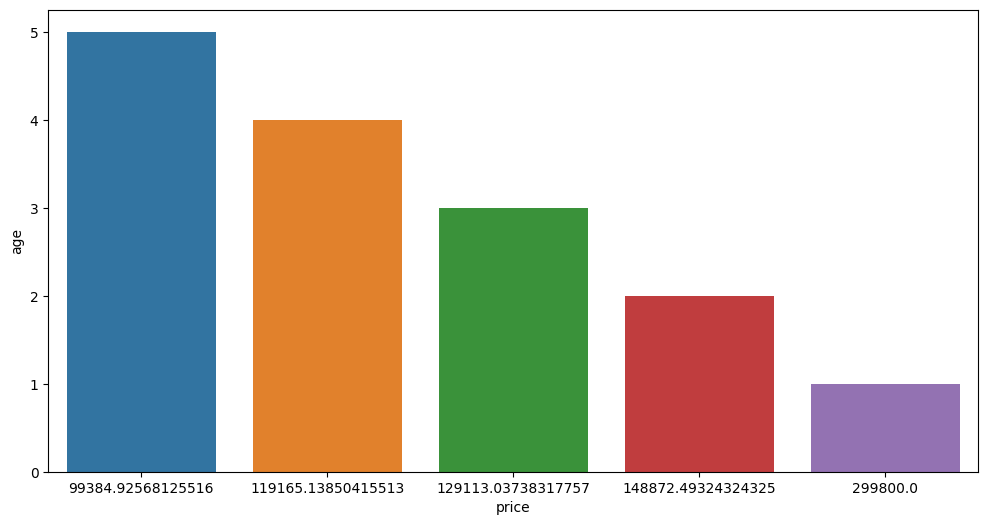

In [173]:
plt.figure(figsize=(12,6))
sns.barplot(x="price",y="age",data=price_with_age)

In [174]:
city_with_prices = data.groupby("city")["price"].mean().sort_index(ascending=False).reset_index().head(5)
city_with_prices

,city,price
0,Zirakpur,72000.000000
1,Yemmiganur,47000.000000
2,Yamuna Nagar,50000.000000
3,Wardha,55999.666667
4,Warangal,102500.000000


<Axes: xlabel='city', ylabel='price'>

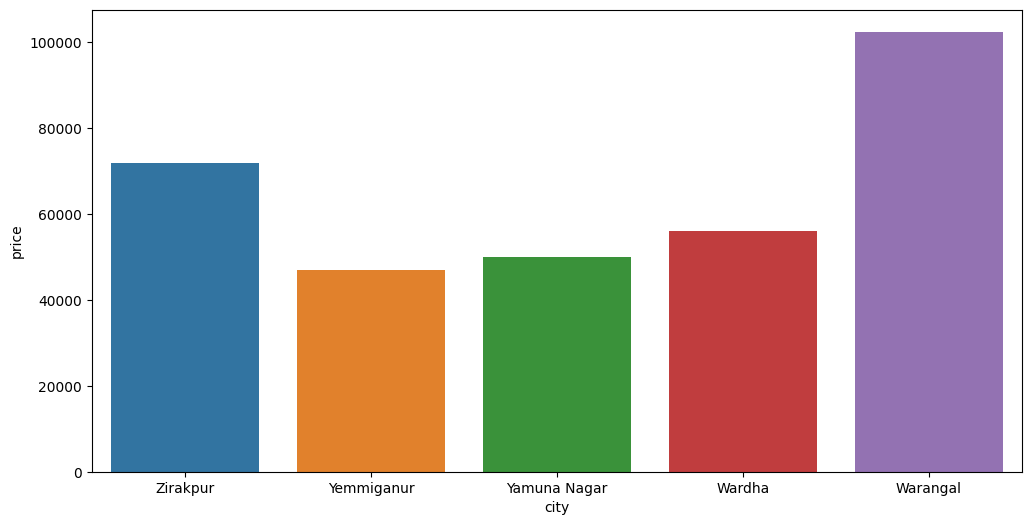

In [175]:
plt.figure(figsize=(12,6))
sns.barplot(x="city",y="price",data=city_with_prices)

In [176]:
data.head(3)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph


In [177]:
brand_with_price = data.groupby("brand")["price"].mean().reset_index().head(10)
brand_with_price

,brand,price
0,BMW,6.735000e+05
1,Bajaj,4.903128e+04
2,Benelli,2.983761e+05
3,Ducati,9.005750e+05
4,Harley-Davidson,4.734291e+05
5,Hero,3.068307e+04
6,Honda,5.147068e+04
7,Hyosung,2.432084e+05
8,Ideal,1.000000e+05
9,Indian,1.100000e+06


<Axes: xlabel='brand', ylabel='price'>

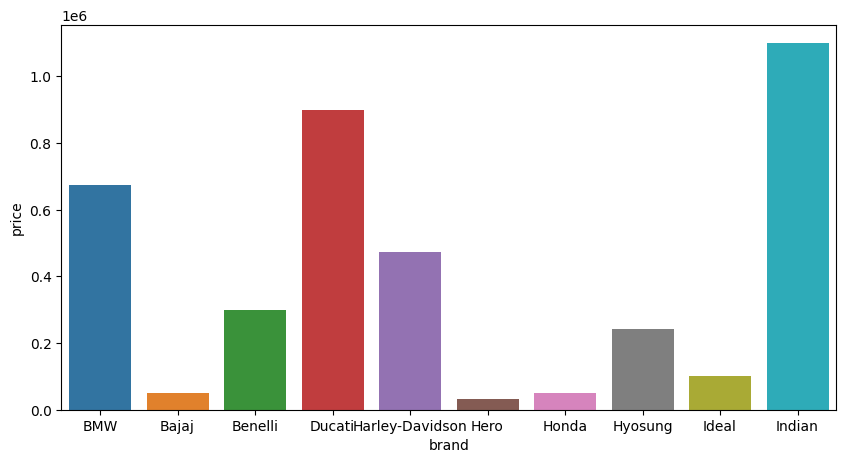

In [178]:
plt.figure(figsize=(10,5))
sns.barplot(x="brand",y="price",data=brand_with_price)


In [179]:
brand_price_max=data.groupby("brand")["price"].max().reset_index().head(10)
brand_price_max


,brand,price
0,BMW,1800000.0
1,Bajaj,195000.0
2,Benelli,785000.0
3,Ducati,1500000.0
4,Harley-Davidson,1100000.0
5,Hero,104000.0
6,Honda,800000.0
7,Hyosung,493500.0
8,Ideal,100000.0
9,Indian,1900000.0


<Axes: xlabel='brand', ylabel='price'>

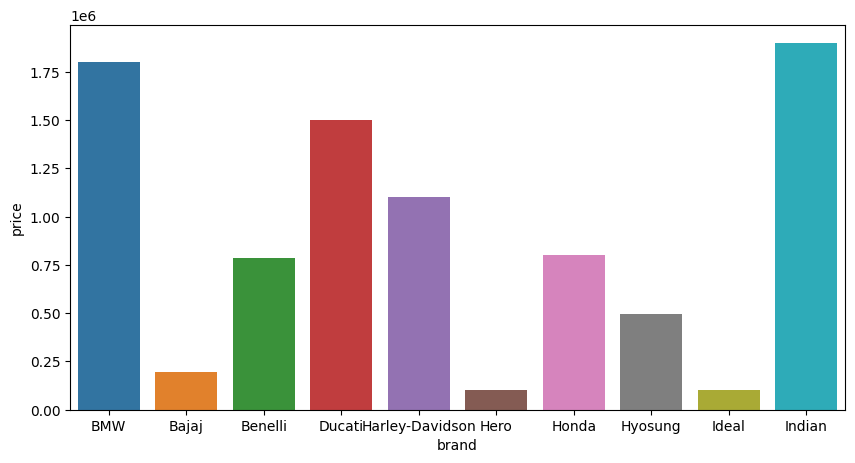

In [180]:
plt.figure(figsize=(10,5))
sns.barplot(x="brand",y="price",data=brand_price_max)

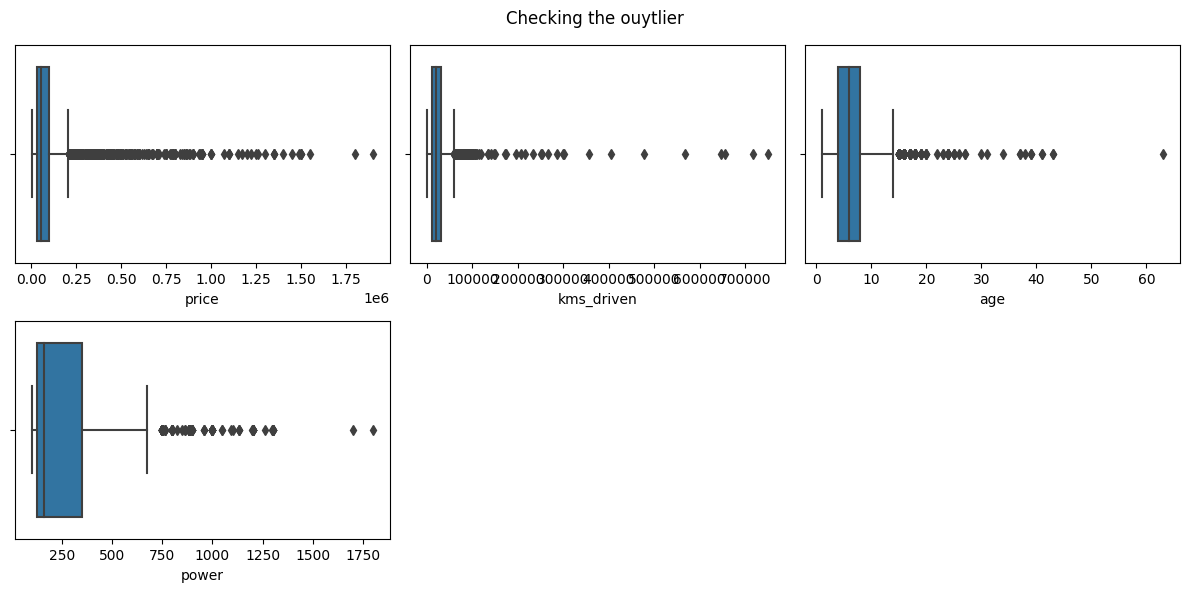

In [181]:
plt.figure(figsize=(12,6))
plt.suptitle("Checking the ouytlier")
for i in range(0,len(numerical_feature)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=data[numerical_feature[i]])
    plt.tight_layout()

In [182]:
data.describe()

,price,kms_driven,age,power
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,8.488390e+04,23910.496587,6.656472,228.133397
std,1.209662e+05,27317.594631,3.605299,158.324219
min,4.400000e+03,1.000000,1.000000,100.000000
25%,3.000000e+04,10155.750000,4.000000,125.000000
50%,5.500000e+04,19000.000000,6.000000,160.000000
75%,1.000000e+05,30112.000000,8.000000,350.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [183]:
data.head(3)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph


In [184]:
data["brand"].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [185]:
data["bike_name"].unique()

array(['TVS Star City Plus Dual Tone 110cc',
       'Royal Enfield Classic 350cc', 'Triumph Daytona 675R',
       'TVS Apache RTR 180cc', 'Yamaha FZ S V 2.0 150cc-Ltd. Edition',
       'Yamaha FZs 150cc', 'Honda CB Hornet 160R  ABS DLX',
       'Hero Splendor Plus Self Alloy 100cc',
       'Royal Enfield Thunderbird X 350cc',
       'Royal Enfield Classic Desert Storm 500cc',
       'Yamaha YZF-R15 2.0 150cc', 'Yamaha FZ25 250cc',
       'Bajaj Pulsar NS200', 'Bajaj Discover 100M', 'Bajaj Discover 125M',
       'Bajaj Pulsar NS200 ABS', 'Bajaj Pulsar RS200 ABS',
       'Suzuki Gixxer SF 150cc', 'Benelli 302R 300CC',
       'Hero Splendor iSmart Plus IBS 110cc',
       'Royal Enfield Classic Chrome 500cc', 'Yamaha FZ V 2.0 150cc',
       'Hero Super Splendor 125cc', 'Honda CBF Stunner 125cc',
       'Bajaj Pulsar 150cc', 'Honda X-Blade 160CC ABS',
       'Bajaj Avenger 220cc', 'KTM RC 390cc', 'Honda CB Unicorn 150cc',
       'KTM Duke 200cc', 'Honda CBR 150R 150cc',
       'Royal Enfiel

In [186]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [187]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

In [188]:
# changing the categorical value into numerical
cate_to_num=["owner","brand"]
for i in cate_to_num:
    data[i] = lable.fit_transform(data[i])

In [189]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,0,3.0,110.0,19
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,0,4.0,350.0,17
2,Triumph Daytona 675R,600000.0,Delhi,110.0,0,8.0,675.0,20
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,0,4.0,180.0,19
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,0,3.0,150.0,21


In [190]:
data.shape

(7324, 8)

## Model Training

In [192]:
x = data.drop("price",axis=1)
y = data["price"] 

In [200]:
# after using label encoder recyling the categorical and numerical columns

categorical_feature_x = x.select_dtypes(include="object").columns
numerical_feature_x = x.select_dtypes(exclude="object").columns

In [201]:
print("categorical_feature_x",categorical_feature_x)
print("numerical_feature_x",numerical_feature_x)

categorical_feature_x Index(['bike_name', 'city'], dtype='object')
numerical_feature_x Index(['kms_driven', 'owner', 'age', 'power', 'brand'], dtype='object')


In [202]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [215]:
numerical_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("scaler",StandardScaler(with_mean=False)),
    ]
)

# Create Preprocess object
preprocessing = ColumnTransformer([
    ("numerical_pipeline",numerical_pipeline,numerical_feature_x),
    ("categorical_pipeline",categorical_pipeline,categorical_feature_x)
])


In [205]:
# Train rest split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [216]:
# Transform
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

In [218]:
from sklearn.linear_model import  LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [219]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [234]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    #"XGBRegressor":XGBRegressor()
    
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    # Make Prediction
    y_predict = model.predict(x_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 1.3646787934043266e+37
MAE 2.7282409576171054e+18
RMSE 3.694155916314749e+19
R2 -7.009597981025256e+26
Ridge
Model Traning Performance
MSE 537755788582.65894
MAE 1830554.5119795462
RMSE 7333183.405470362
R2 72.37846804572688
Lesso
Model Traning Performance
MSE 321401343628.36115
MAE 1652176.376818984
RMSE 5669226.963425976
R2 83.49139577544034
Elastic
Model Traning Performance
MSE 662887373128.7156
MAE 2287179.2693111748
RMSE 8141789.56451661
R2 65.95115264641257
LinearSVR
Model Traning Performance
MSE 2462755948854.11
MAE 7212795.266593469
RMSE 15693170.326145416
R2 -26.498112305106012
DecisionTreeRegressor
Model Traning Performance
MSE 357958569122.9352
MAE 1739260.5460750852
RMSE 5982963.89027157
R2 81.61365388293679
RandomForestRegressor
Model Traning Performance
MSE 263664813905.3219
MAE 1396255.9048269137
RMSE 5134830.220224637
R2 86.45700104558915


In [231]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "Elastic":ElasticNet(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    #"XGBRegressor":XGBRegressor()
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []
testing_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    # Make Prediction
    y_predict = model.predict(x_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("Traning_scor",trainig_score)
    print("Testing_score",testing_score)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)
    testing_score.append(test_score)

LinearRegression
Model Traning Performance
MSE 1.3646787934043266e+37
MAE 2.7282409576171054e+18
RMSE 3.694155916314749e+19
R2 -7.009597981025256e+26
Traning_scor []
Testing_score []
Ridge
Model Traning Performance
MSE 537755788582.65894
MAE 1830554.5119795462
RMSE 7333183.405470362
R2 72.37846804572688
Traning_scor [0.9646916776839857]
Testing_score [-7.009597981025255e+24]
Lasso
Model Traning Performance
MSE 321401343628.36115
MAE 1652176.376818984
RMSE 5669226.963425976
R2 83.49139577544034
Traning_scor [0.9646916776839857, 0.9649093887699798]
Testing_score [-7.009597981025255e+24, 0.7237846804572687]
Elastic
Model Traning Performance
MSE 662887373128.7156
MAE 2287179.2693111748
RMSE 8141789.56451661
R2 65.95115264641257
Traning_scor [0.9646916776839857, 0.9649093887699798, 0.9649093329499293]
Testing_score [-7.009597981025255e+24, 0.7237846804572687, 0.8349139577544034]
LinearSVR
Model Traning Performance
MSE 2462750712629.7974
MAE 7212813.4294339735
RMSE 15693153.643005595
R2 -26.

In [235]:
trainig_score

[0.9646916776839857,
 0.9649093887699798,
 0.9649093329499293,
 0.9056936458392089,
 -0.3216946836917065,
 0.9988027852721549,
 0.9866165083275694]

In [236]:
testing_score

[-7.009597981025255e+24,
 0.7237846804572687,
 0.8349139577544034,
 0.6595115264641257,
 -0.26497843349308137,
 0.7526134762317347,
 0.8686167503145206]

In [237]:
data.to_csv("Clean_Bike_Price_Data.csv",index=False)